<a href="https://colab.research.google.com/github/kamalsai369/Pytorch_practice/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
 #pytorch workflow
 #lets explore

In [65]:
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
print(torch.__version__)

2.5.1+cu121


In [66]:
#data preparation and loading
weight=0.7
bias=0.3
#create
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [67]:
len(X),len(y)

(50, 50)

In [68]:
#splitting data into training and testing

In [69]:
#create train test split
train_split=0.8*len(X)
test_split=0.2*len(X)
xtrain,ytrain=X[:int(train_split)],y[:int(train_split)]
xtest,ytest=X[int(train_split):],y[int(train_split):]


In [70]:
len(xtest),len(ytest),len(xtrain),len(ytrain)

(10, 10, 40, 40)

In [71]:
def plot_predictions(train_data=xtrain,
                     train_labels=ytrain,
                     test_data=xtest,
                     test_label=ytest,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="training data")
  plt.scatter(test_data,test_label,c="g",s=4,label="test data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
  plt.legend(prop={"size":14 })

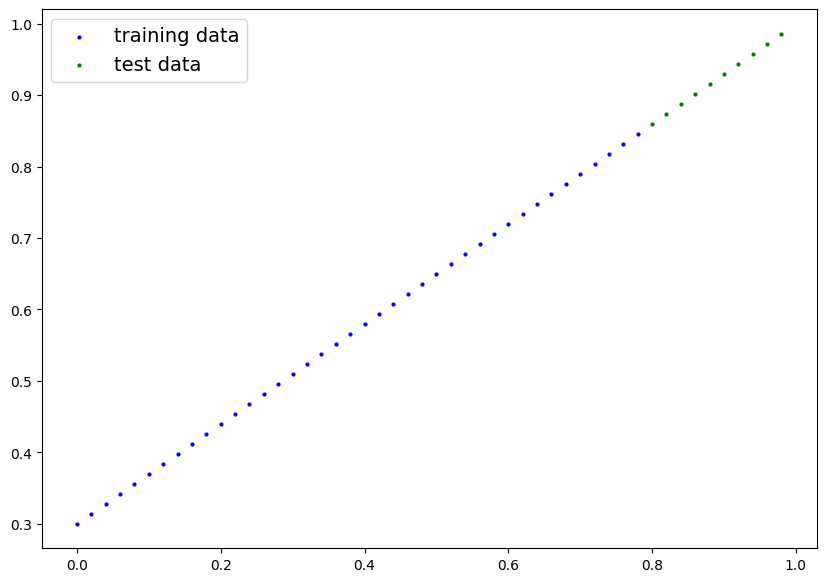

In [72]:
plot_predictions()

In [73]:
#build model
#create linear regression model class
from torch import nn
class LinearRegressionModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                           requires_grad=True,
                              dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))
    #forward method to defi ne the computation of the model
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights*x+self.bias

In [74]:
#checking the contents of our pytorch model
#create a random seeed
torch.manual_seed(42)
#create an instance of the model
model_0=LinearRegressionModel()
#check the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [75]:
#list named  parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [76]:
weight,bias

(0.7, 0.3)

In [77]:
#making predictions using torch.inference_mode()
with torch.inference_mode():
  y_preds=model_0(xtest)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [78]:
ytest

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

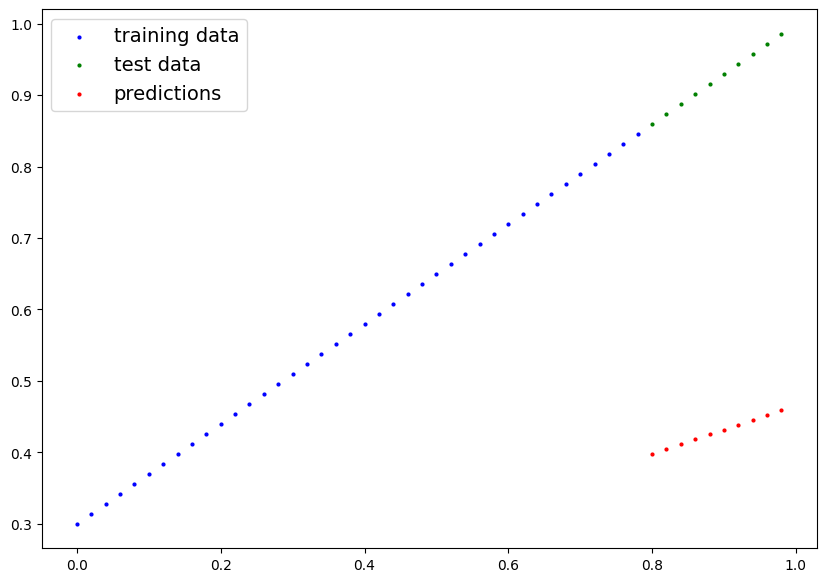

In [79]:
plot_predictions(predictions=y_preds)
#because of initialized parameters ramdomly the reuslt also got randomly
#so we nedd to reduce the error by using gradientdescent or backpropagation

In [80]:
#train the model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [81]:
#setup loss function
loss_fn=nn.L1Loss()

In [82]:
#setup optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

In [83]:
#building a training loop in pytorch
# A couple Of things we need in a training loop:
# 0. Loop through the data
# I. Forward pass (this involves data moving through our model 's e forward( ) •
# functions) to make predictions on data — also called forward propagation
# 2. Calculate the loss (compare forward pass predictions to ground truth labels )
# 3. Optimizer zero grad
# 4. LOSS backward — move backwards through the network to calculate the gradients Of
# each of the parameters of our model with respect to the loss
# 5. Optimizer Step — use the optimizer to adjust our model 's parameters to try and
# improve the loss


In [84]:
torch.manual_seed(42)
epochs=125
epoch_count=[]
loss_values=[]
test_loss_values=[]
for epoch in range(epochs):
  #set the model to training mode
  model_0.train()

  #1.forward pass
  y_pred=model_0(xtrain)

  #2. calculate the loss
  loss=loss_fn(y_pred,ytrain)
  print(f"loss:{loss}")

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. loss backward
  loss.backward()

  #5. optimizer step
  optimizer.step()

  model_0.eval()


  print(model_0.state_dict())
  with torch.inference_mode():
    test_pred=model_0(xtest)
    test_loss=loss_fn(test_pred,ytest)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())


loss:0.31288138031959534
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
loss:0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
loss:0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
loss:0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
loss:0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
loss:0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
loss:0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
loss:0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
loss:0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias'

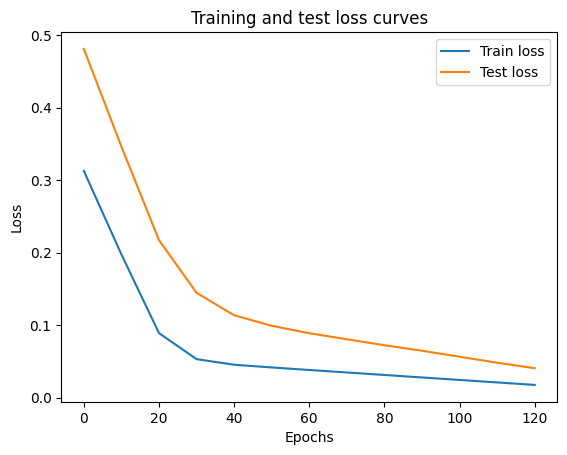

In [85]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [86]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6211])), ('bias', tensor([0.3333]))])

In [87]:

with torch.inference_mode():

  y_predsnew=model_0(xtest)
y_predsnew

tensor([[0.8302],
        [0.8426],
        [0.8551],
        [0.8675],
        [0.8799],
        [0.8923],
        [0.9048],
        [0.9172],
        [0.9296],
        [0.9420]])

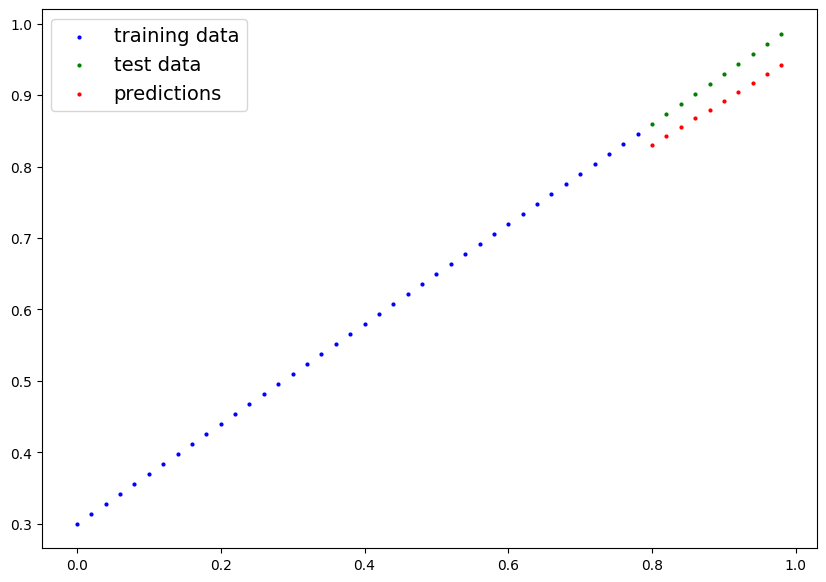

In [88]:

plot_predictions(predictions=y_predsnew)

In [89]:
with torch.inference_mode():
  test_pred=model_0(xtest)
  test_loss=loss_fn(test_pred,ytest)
print(f"Epoch:{epoch} | loss :{loss} | testloss:{test_loss}")


Epoch:124 | loss :0.016210997477173805 | testloss:0.03688368946313858


In [90]:
# saving a model in pytorch
# There are three main methods you should about for saving and loading models in PyTorch.

# torch.save() - allows you save a PyTorch object in Python's pickle format
# torch.load() - allows you load a saved PyTorch object
# torch.nn.Module.load_state_dict() - this allows to load a model's saved state dictionar

In [95]:
from pathlib import Path
#create a model directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
#create  model save path
MODEL_NAME="01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
#saving the model save dict
print(f"saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

saving model to:models/01_pytorch_workflow_model.pth


In [96]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1668 Dec 17 10:30 01_pytorch_workflow_model.pth
